# **Plant Seedling Classification**
By: Vaibhav, Kavya, Soham, Tanuj

In [1]:
!gdown https://drive.google.com/u/0/uc?id=1rrUPO3O3HumiYjesilRyeayFer8Wv4kv&export=download

Downloading...
From: https://drive.google.com/u/0/uc?id=1rrUPO3O3HumiYjesilRyeayFer8Wv4kv
To: /content/dataset.zip
1.71GB [00:09, 189MB/s] 


In [7]:
!unzip -qq dataset.zip

In [8]:
import os
import cv2
import pathlib
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras.models import Sequential, save_model, load_model
from keras.layers import Activation, Dense, GlobalAveragePooling1D, GlobalAveragePooling2D, Dropout, Conv2D, MaxPool2D, Flatten, BatchNormalization
from keras.applications.inception_resnet_v2 import *
from tensorflow.keras.models import Model
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import load_img
from skimage import measure
import numpy as np
import pandas as pd
from keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
from keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.preprocessing import image
import random

In [9]:
#Plotting random images from each class along with the class names
'''
seeds = ['Black-grass','Charlock','Cleavers','Common Chickweed', 'Common wheat', 'Fat Hen', 'Loose Silky-bent', 'Maize', 'Scentless Mayweed', "Shepherd’s Purse", 'Small-flowered Cranesbill', 'Sugar beet' ]
fig, ax = plt.subplots(12, 1, figsize=(50, 50))
for g, i in enumerate(seeds):
  n = random.randint(1,100)
  ax[g].set_title(i)
  ax[g].imshow(plt.imread(f"./{i}/{n}.png"))
'''
batch_size = 64

data_path = '/content/dataset'
train_dir = os.path.join(data_path,'train')
test_dir = os.path.join(data_path, 'test')
train_datagen=ImageDataGenerator(validation_split=0.2, rescale = 1./255, horizontal_flip=True, height_shift_range=0.5) 
train_data=train_datagen.flow_from_directory(train_dir,
                                                    batch_size = batch_size,
                                                    subset = 'training',
                                                    shuffle = True,
                                                    color_mode = 'rgb',
                                                    target_size = (256, 256))

validation_data=train_datagen.flow_from_directory(train_dir,
                                                    batch_size = batch_size,
                                                    subset = 'validation',
                                                    shuffle = True,
                                                    color_mode = 'rgb',
                                                    target_size = (256, 256))
                                                    
#class names
class_names = train_data.class_indices
#printing class names
print(class_names)

Found 4432 images belonging to 12 classes.
Found 1102 images belonging to 12 classes.
{'Black-grass': 0, 'Charlock': 1, 'Cleavers': 2, 'Common Chickweed': 3, 'Common wheat': 4, 'Fat Hen': 5, 'Loose Silky-bent': 6, 'Maize': 7, 'Scentless Mayweed': 8, 'Shepherds Purse': 9, 'Small-flowered Cranesbill': 10, 'Sugar beet': 11}


In [11]:
# exploratory_dir = os.path.join(data_path,'train/Black-grass')
# exploratory_datagen=ImageDataGenerator(rescale = 1./255)
# exploratory_data=train_datagen.flow_from_directory(exploratory_dir,
#                                                     # batch_size = 32,
#                                                     # subset = 'training',
#                                                     # shuffle = True,
#                                                     color_mode = 'rgb'
#                                                     )
train_data_path = '/content/dataset/train/'
len_nums = []
 
for i in class_names:
  train_length_path = os.path.join(train_data_path, i)
  length = len(os.listdir(train_length_path))
  len_nums.append(length)
  print(f"There are {length} images in {i}")

print("\n" + "There are " + str(np.sum(np.array(len_nums))) + " images in this dataset")

There are 308 images in Black-grass
There are 452 images in Charlock
There are 335 images in Cleavers
There are 712 images in Common Chickweed
There are 253 images in Common wheat
There are 537 images in Fat Hen
There are 762 images in Loose Silky-bent
There are 257 images in Maize
There are 606 images in Scentless Mayweed
There are 274 images in Shepherds Purse
There are 575 images in Small-flowered Cranesbill
There are 463 images in Sugar beet

There are 5534 images in this dataset


In [12]:
reverse_class = {j:i for i,j in class_names.items()}

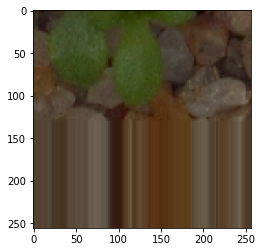

Black-grass


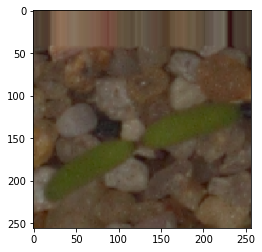

Charlock


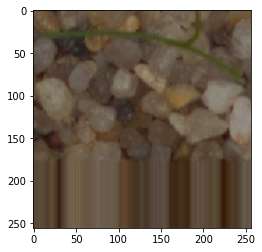

Cleavers


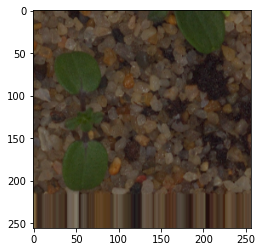

Common Chickweed


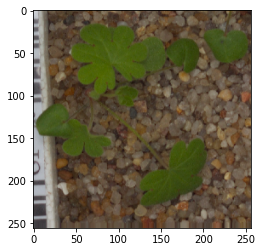

Common wheat


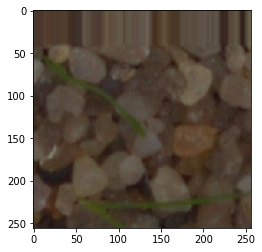

Fat Hen


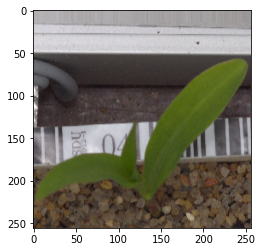

Loose Silky-bent


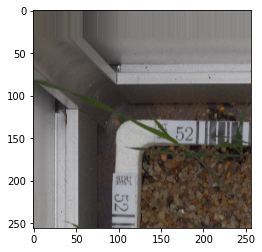

Maize


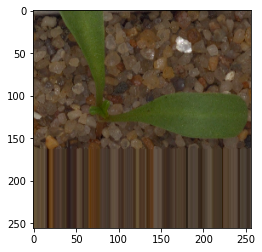

Scentless Mayweed


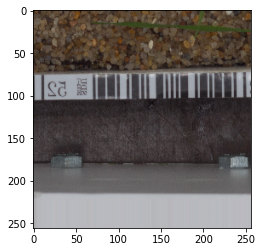

Shepherds Purse


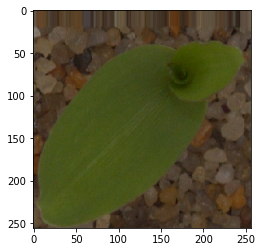

Small-flowered Cranesbill


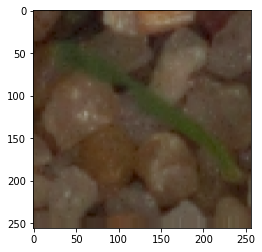

Sugar beet


In [13]:
img, label = next(train_data)
for i in range(12):
    image = img[i]
    plt.imshow(image)
    plt.show()
    labels = {j:i for i,j in class_names.items()}
    print(labels[i])

In [14]:
print(img.shape)


(64, 256, 256, 3)


In [28]:
model = Sequential()
model.add(Conv2D(filters=64, kernel_size=(3, 3), input_shape=(256, 256, 3), activation='relu'))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D((2, 2)))
model.add(MaxPool2D((2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(12, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

# Compile the model
# reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
#                               patience=3, verbose = 1)
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001),metrics=['accuracy'])



Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 254, 254, 64)      1792      
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 127, 127, 64)      0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 125, 125, 64)      36928     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 60, 60, 128)       73856     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 30, 30, 128)       0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 28, 28, 128)      

In [29]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

In [30]:
trained_model = model.fit(train_data, validation_data=validation_data, epochs = 20, batch_size = batch_size, callbacks=[es])

Epoch 1/20
70/70 [==============================] - 111s 2s/step - loss: 2.4621 - accuracy: 0.1140 - val_loss: 2.4096 - val_accuracy: 0.1388
Epoch 2/20
70/70 [==============================] - 108s 2s/step - loss: 2.3534 - accuracy: 0.1984 - val_loss: 1.9851 - val_accuracy: 0.3122
Epoch 3/20
70/70 [==============================] - 107s 2s/step - loss: 1.9979 - accuracy: 0.3097 - val_loss: 1.9022 - val_accuracy: 0.3475
Epoch 4/20
70/70 [==============================] - 108s 2s/step - loss: 1.8840 - accuracy: 0.3362 - val_loss: 1.7808 - val_accuracy: 0.3693
Epoch 5/20
70/70 [==============================] - 108s 2s/step - loss: 1.7643 - accuracy: 0.3716 - val_loss: 1.6304 - val_accuracy: 0.4319
Epoch 6/20
70/70 [==============================] - 107s 2s/step - loss: 1.6529 - accuracy: 0.4144 - val_loss: 1.4316 - val_accuracy: 0.4982
Epoch 7/20
70/70 [==============================] - 108s 2s/step - loss: 1.4904 - accuracy: 0.4723 - val_loss: 1.3088 - val_accuracy: 0.5417
Epoch 8/20
70

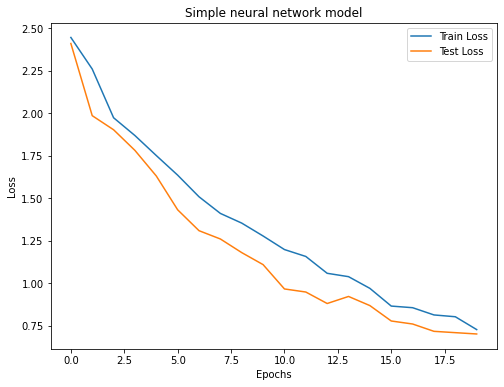

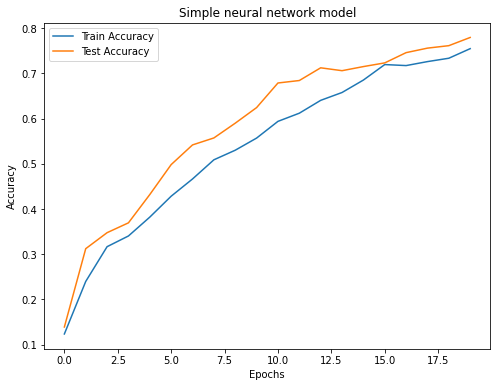

In [31]:
plt.rcParams["figure.figsize"] = (8, 6)
plt.title("Simple neural network model")

plt.plot(trained_model.history['loss'], label='Train Loss') 

plt.plot(trained_model.history['val_loss'], label='Test Loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#Accuracy

plt.rcParams["figure.figsize"] = (8, 6)
plt.title("Simple neural network model")

plt.plot(trained_model.history['accuracy'], label='Train Accuracy') 

plt.plot(trained_model.history['val_accuracy'], label='Test Accuracy')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [36]:
test_data=train_datagen.flow_from_directory(train_dir,
                                                    batch_size = batch_size,
                                                    subset = 'validation',
                                                    shuffle = True,
                                                    color_mode = 'rgb',
                                                    target_size = (256, 256))


Found 1102 images belonging to 12 classes.
(64, 256, 256, 3)


(256, 256, 3)

In [43]:
test_data=train_datagen.flow_from_directory(train_dir,
                                                    batch_size = batch_size,
                                                    subset = 'validation',
                                                    shuffle = True,
                                                    color_mode = 'rgb',
                                                    target_size = (256, 256))

img, label = next(test_data)
print(img.shape)
test_img = img[0]
test_img.shape


Found 1102 images belonging to 12 classes.
(64, 256, 256, 3)


(256, 256, 3)

[1.6573995e-05 6.0992543e-02 9.2696410e-01 1.9846968e-06 4.3459623e-03
 5.5697439e-03 7.9293699e-07 1.6718617e-05 1.3803611e-04 4.3371515e-04
 5.5083721e-05 1.4647510e-03]
2
This is an image of a Cleavers


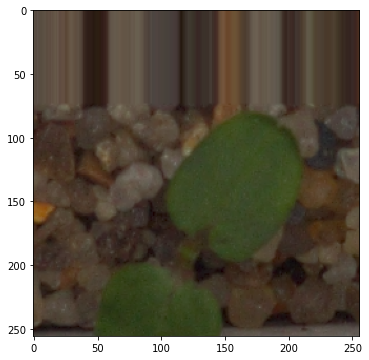

In [44]:
class_dict = {
    0 : "Black-grass",
    1 : "Charlock",
    2 : "Cleavers",
    3 : "Common Chickweed",
    4 : "Common Wheat",
    5 : "Fat Hen",
    6 : "Loose Silky-bent",
    7 : "Maize",
    8 : "Scentless Mayweed",
    9 : "Shepherds Purse",
    10 : "Small-flowered Cransebill",
    11 : "Sugar beet"
}

test_pred_out = model.predict(img)
type(test_pred_out)
print(test_pred_out[0])
pred_maximum = np.argmax(test_pred_out[0])
print(pred_maximum)

 

seed_class = class_dict.get(pred_maximum)
print(f"This is an image of a {seed_class}")
plt.imshow(img[0])

In [34]:
test_image = plt.imread('/content/dataset/test/1.png')
test_image.shape

(297, 297, 3)